## Exploratory Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets

data = pd.read_csv('data/FinalData.tsv', sep='\t')

In [3]:
# Count of how many rows
print(f"Number of rows: {data.shape[0]}")
# Count of how many columns
print(f"Number of columns: {data.shape[1]}")
# Example of first line
print(data.head(1))

Number of rows: 7976
Number of columns: 13
      tconst titleType  primaryTitle originalTitle  startYear endYear  \
0  tt0903747  tvSeries  Breaking Bad  Breaking Bad       2008    2013   

  runtimeMinutes                genres  averageRating  numVotes  \
0             45  Crime,Drama,Thriller            9.5   2405005   

   weightedRating                                         top_3_cast  \
0        9.486874  [('Bryan Cranston', 'Walter White'), ('Aaron P...   

                                         description  
0  Walter White, a New Mexico chemistry teacher, ...  


### Plots and Graphics

In [5]:
# Distribution of movie and tv series
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='titleType')
plt.title('Distribution of Movies and TV Series')
plt.xlabel('titleType')
plt.ylabel('Count')
plt.show()

# Description Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['description'].str.len(), bins=30)
plt.title('Description Length Distribution')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.show()

# Most Popular Genres
plt.figure(figsize=(12, 8))
genre_counts = data['genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False).head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

NameError: name 'data' is not defined

### Data Analysis - Reviews

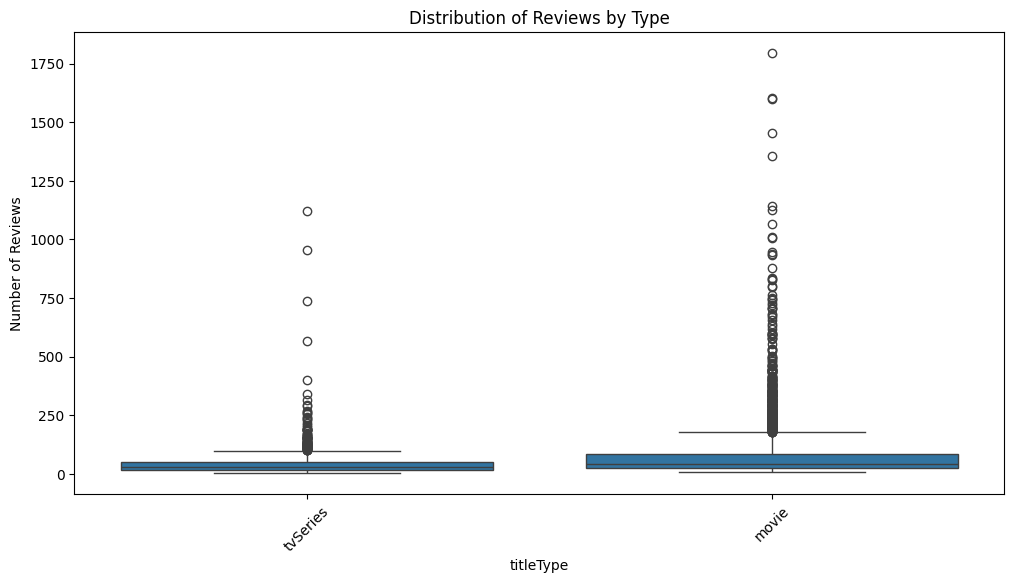

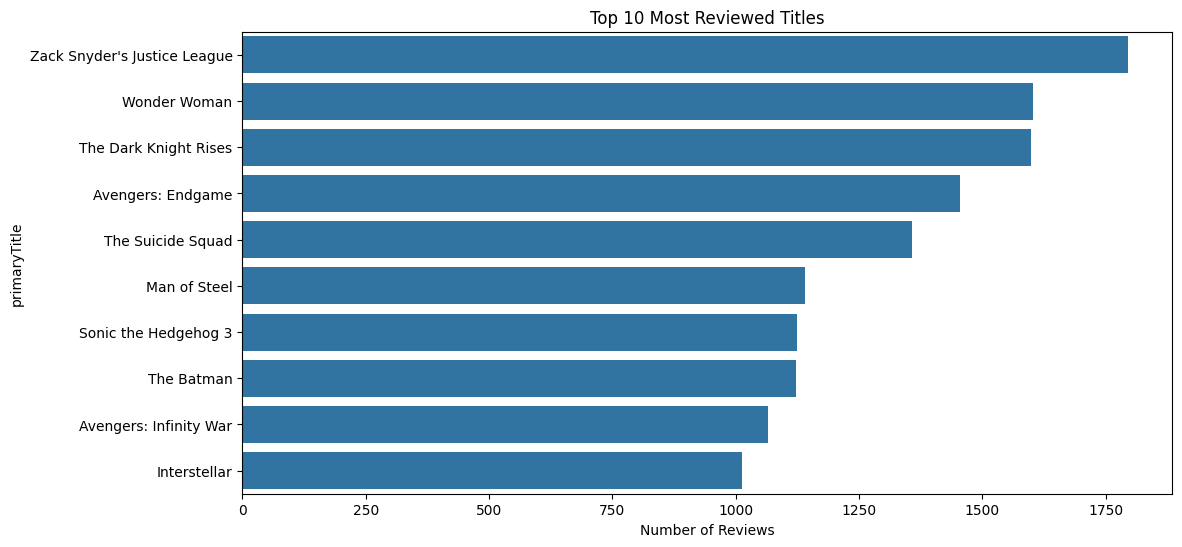

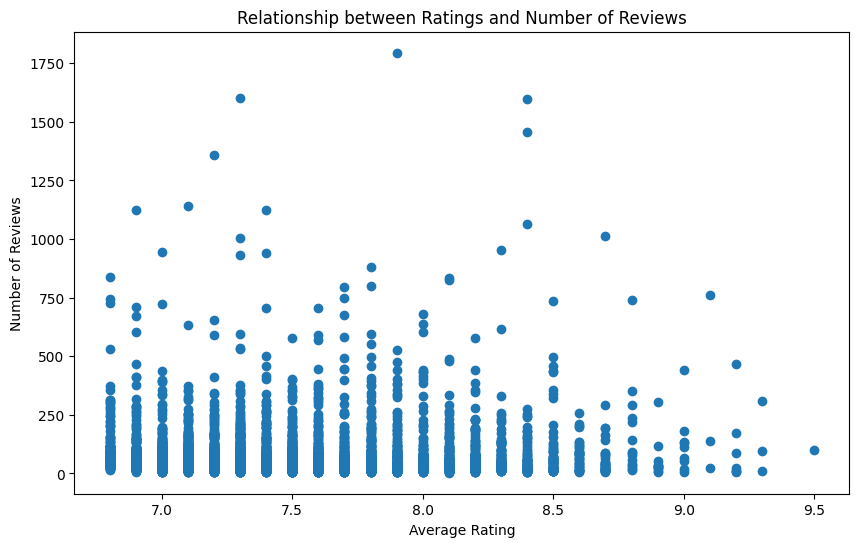

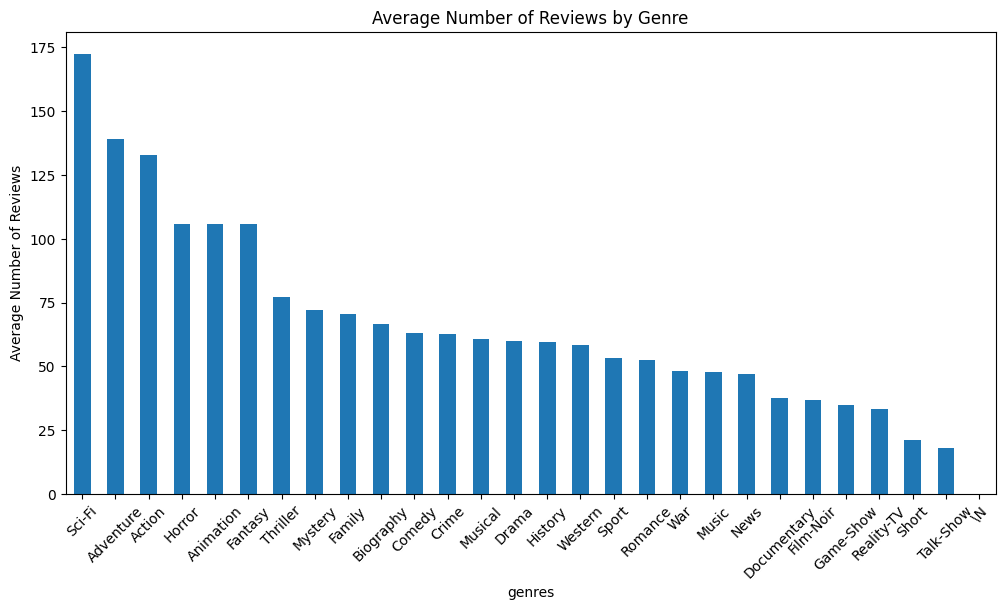


Summary Statistics:
Total number of reviews: 387057
Average reviews per title: 71.19
Median reviews per title: 38.00

Reviews by Title Type:
            count       mean         std  min   25%   50%   75%     max
titleType                                                              
movie      3664.0  79.209607  120.428391  7.0  23.0  41.0  85.0  1795.0
tvSeries   1113.0  44.779874   65.544956  3.0  17.0  28.0  50.0  1123.0

Correlation between ratings and number of reviews: 0.03


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the datasets
data = pd.read_csv('data/FinalData.tsv', sep='\t')
reviews = pd.read_csv('data/FinalReviews.csv')

# 1. Basic Analysis of Reviews per Title
reviews_per_title = reviews.groupby('review_tconst').size().reset_index(name='review_count')
title_reviews = data.merge(reviews_per_title, left_on='tconst', right_on='review_tconst', how='left')

# Plot distribution of reviews by type
plt.figure(figsize=(12, 6))
sns.boxplot(data=title_reviews, x='titleType', y='review_count')
plt.title('Distribution of Reviews by Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Reviews')
plt.show()

# 2. Top 10 Most Reviewed Titles
top_reviewed = title_reviews.nlargest(10, 'review_count')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reviewed, x='review_count', y='primaryTitle')
plt.title('Top 10 Most Reviewed Titles')
plt.xlabel('Number of Reviews')
plt.show()

# 3. Reviews vs Rating Analysis
plt.figure(figsize=(10, 6))
plt.scatter(title_reviews['averageRating'], title_reviews['review_count'])
plt.xlabel('Average Rating')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Ratings and Number of Reviews')
plt.show()

# 4. Reviews by Genre
# First, split the genres and create separate rows
genres_split = title_reviews.assign(genres=title_reviews['genres'].str.split(',')).explode('genres')
genre_reviews = genres_split.groupby('genres')['review_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_reviews.plot(kind='bar')
plt.title('Average Number of Reviews by Genre')
plt.xticks(rotation=45)
plt.ylabel('Average Number of Reviews')
plt.show()

# 5. Print Summary Statistics
print("\nSummary Statistics:")
print(f"Total number of reviews: {len(reviews)}")
print(f"Average reviews per title: {title_reviews['review_count'].mean():.2f}")
print(f"Median reviews per title: {title_reviews['review_count'].median():.2f}")
print("\nReviews by Title Type:")
print(title_reviews.groupby('titleType')['review_count'].describe())

# 6. Correlation between ratings and reviews
correlation = title_reviews['averageRating'].corr(title_reviews['review_count'])
print(f"\nCorrelation between ratings and number of reviews: {correlation:.2f}")

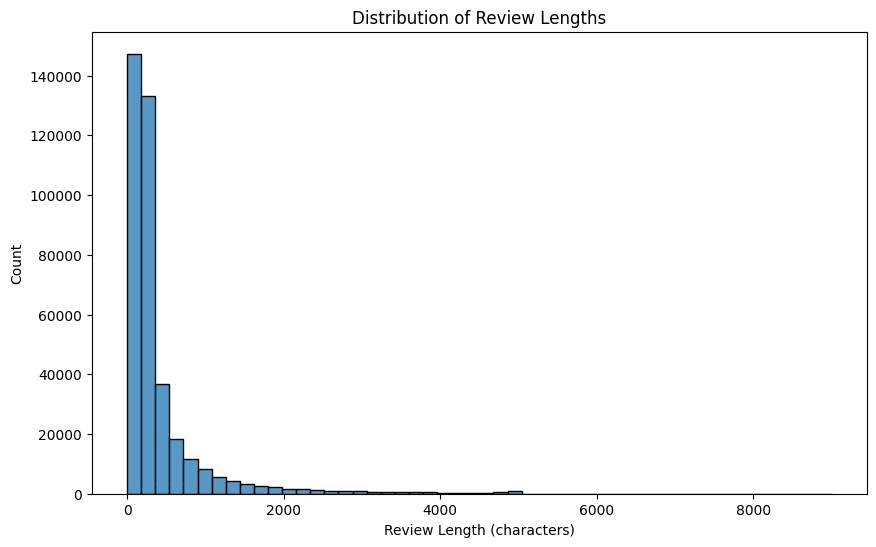

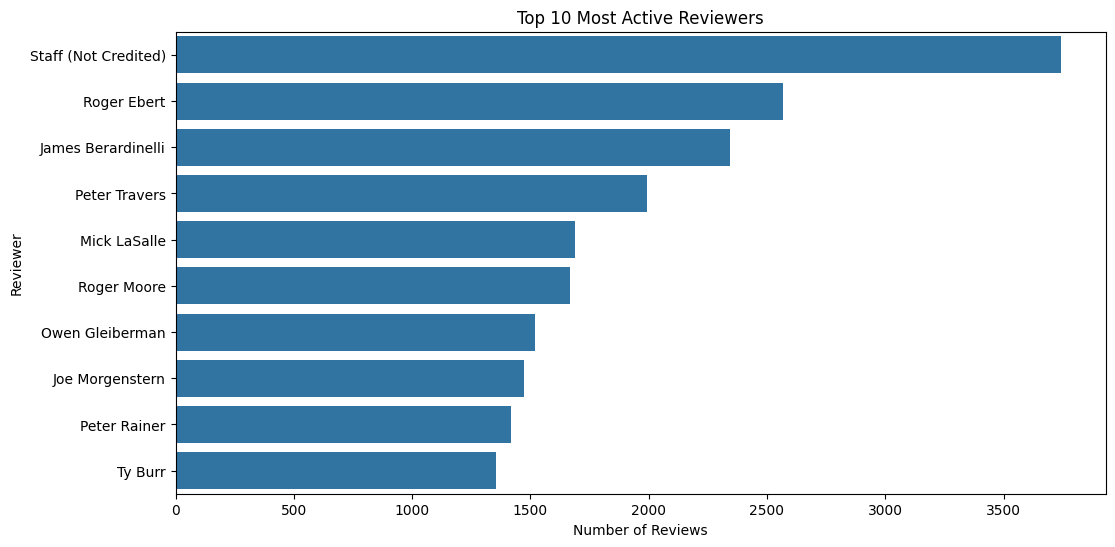

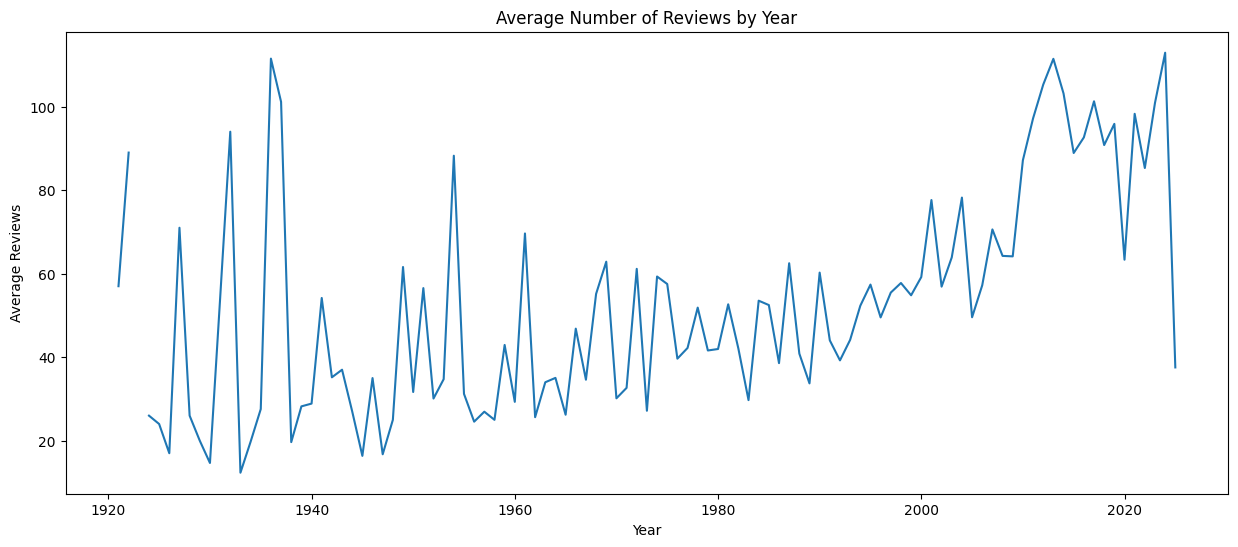


Review Content Statistics:
Average review length: 423 characters
Median review length: 220 characters
Number of unique reviewers: 75380
Average reviews per author: 5.13


In [2]:
# Review Length Analysis
plt.figure(figsize=(10, 6))
sns.histplot(reviews['review_content'].str.len(), bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

# Top Reviewers Analysis
top_reviewers = reviews.groupby('review_author').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index)
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.show()

# Review Statistics by Year
title_reviews['year'] = pd.to_numeric(title_reviews['startYear'], errors='coerce')
yearly_reviews = title_reviews.groupby('year')['review_count'].mean()

plt.figure(figsize=(15, 6))
yearly_reviews.plot(kind='line')
plt.title('Average Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Average Reviews')
plt.show()

# Print Additional Statistics
print("\nReview Content Statistics:")
print(f"Average review length: {reviews['review_content'].str.len().mean():.0f} characters")
print(f"Median review length: {reviews['review_content'].str.len().median():.0f} characters")
print(f"Number of unique reviewers: {reviews['review_author'].nunique()}")
print(f"Average reviews per author: {len(reviews)/reviews['review_author'].nunique():.2f}")

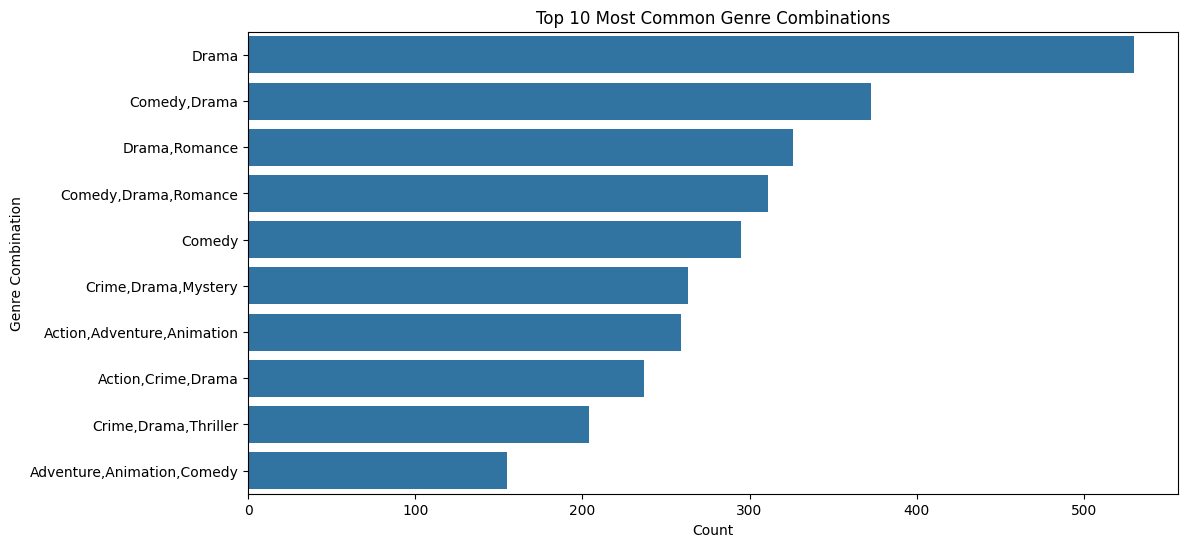

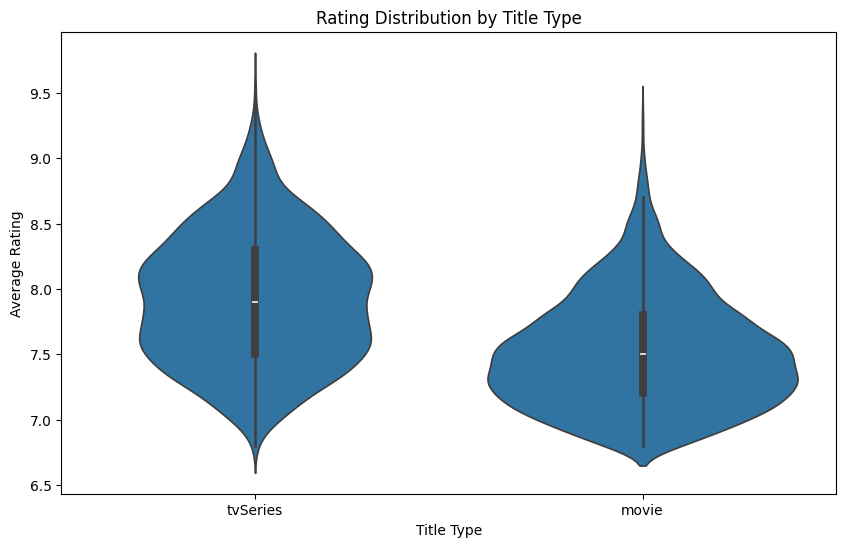

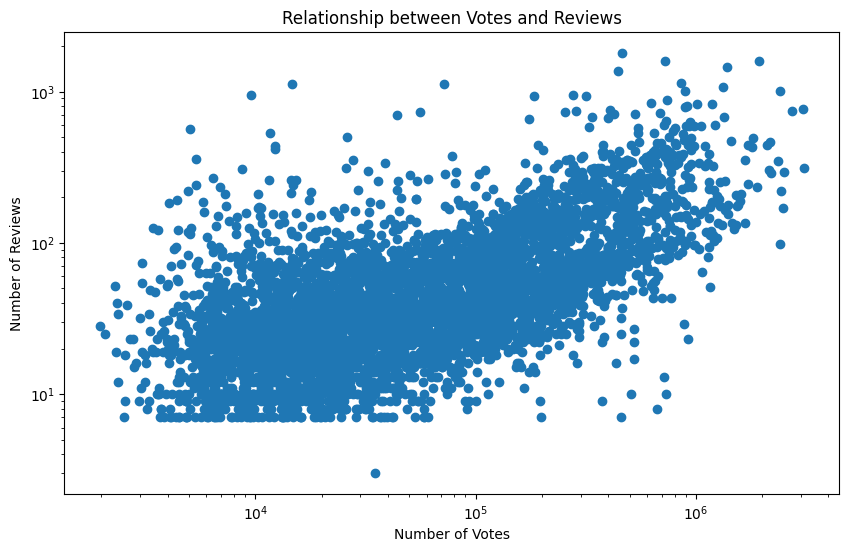


Genre Statistics:
Average ratings by genre:
genres
Short         8.271429
Talk-Show     8.263333
Game-Show     8.148649
Reality-TV    8.107273
News          8.062500
Name: averageRating, dtype: float64

Most reviewed genres:
genres
Drama      5367
Comedy     2572
Crime      1651
Action     1441
Romance    1198
dtype: int64


In [3]:
# Genre Combination Analysis
plt.figure(figsize=(12, 6))
genre_combinations = data['genres'].value_counts().head(10)
sns.barplot(x=genre_combinations.values, y=genre_combinations.index)
plt.title('Top 10 Most Common Genre Combinations')
plt.xlabel('Count')
plt.ylabel('Genre Combination')
plt.show()

# Rating Distribution by Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=title_reviews, x='titleType', y='averageRating')
plt.title('Rating Distribution by Title Type')
plt.xlabel('Title Type')
plt.ylabel('Average Rating')
plt.show()

# Reviews vs Votes Analysis
plt.figure(figsize=(10, 6))
plt.scatter(title_reviews['numVotes'], title_reviews['review_count'])
plt.xlabel('Number of Votes')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Votes and Reviews')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Print Additional Genre Statistics
print("\nGenre Statistics:")
print("Average ratings by genre:")
print(genres_split.groupby('genres')['averageRating'].mean().sort_values(ascending=False).head())
print("\nMost reviewed genres:")
print(genres_split.groupby('genres').size().sort_values(ascending=False).head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


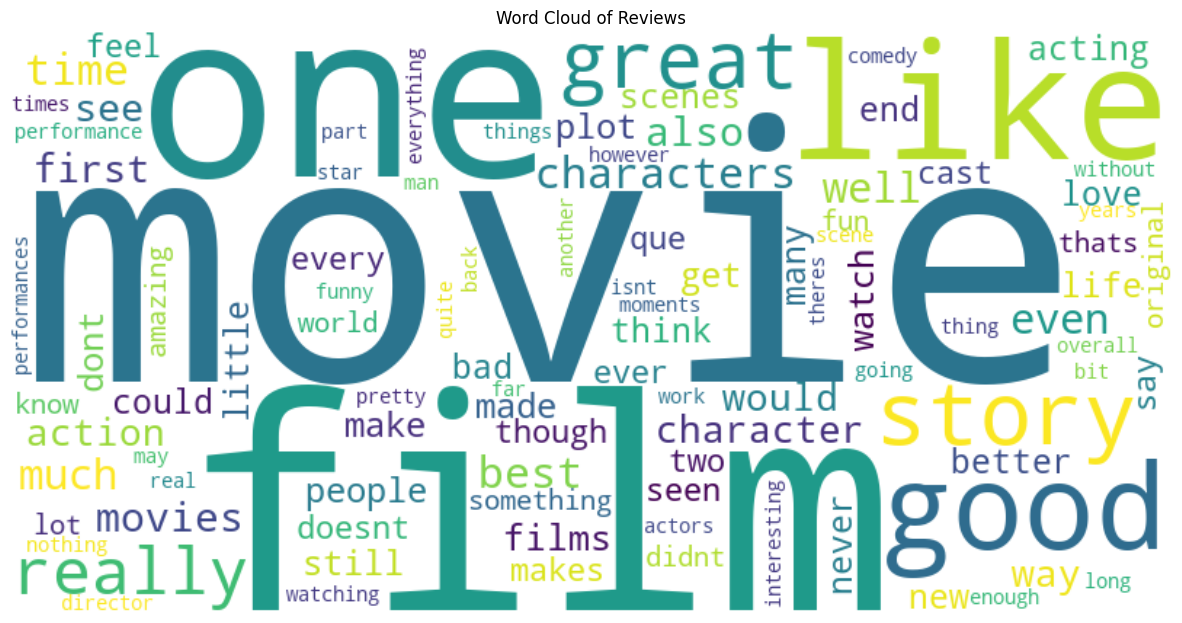

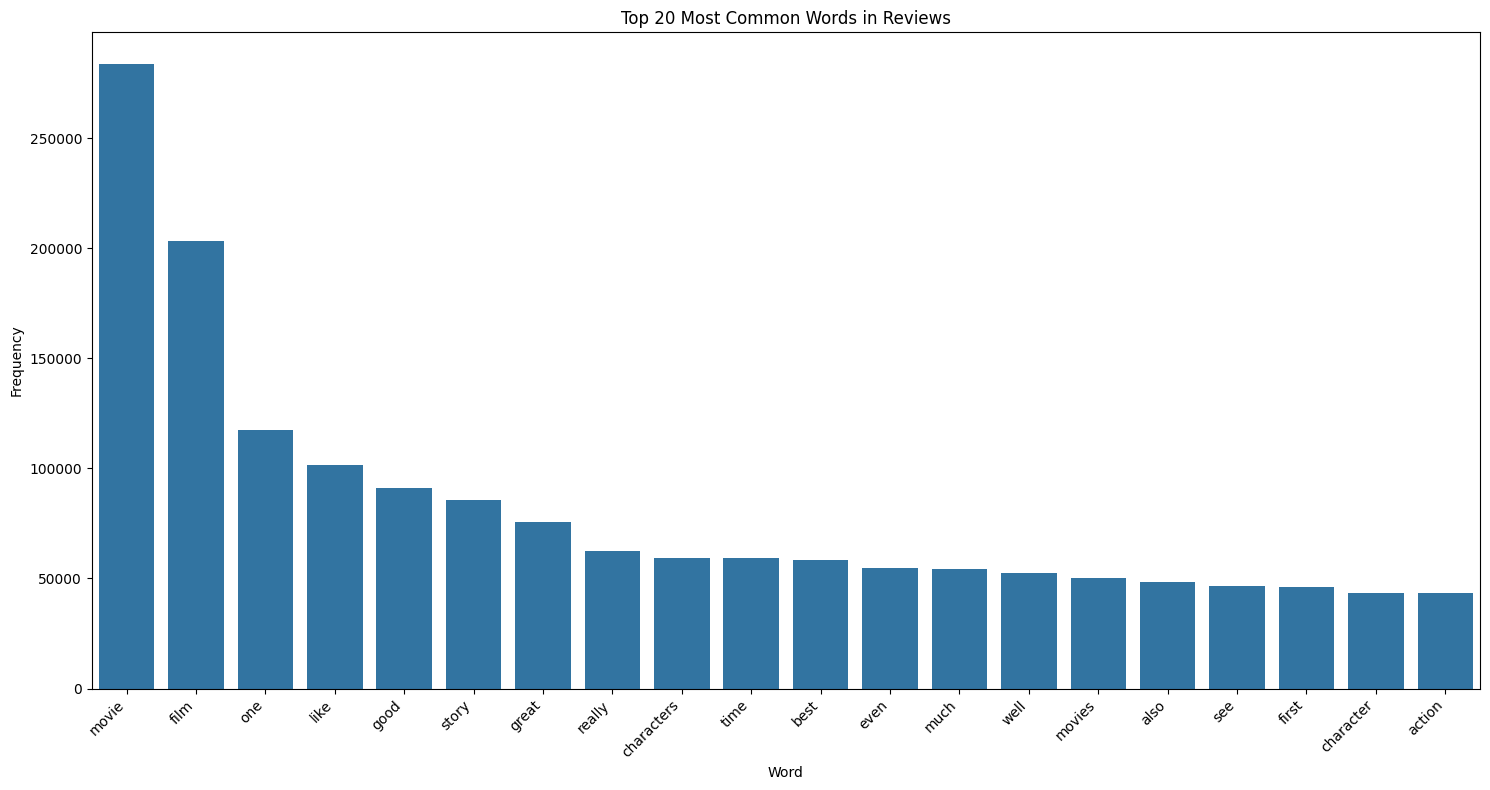


Vocabulary Statistics:
Total unique words: 284666

Top 20 most common words and their frequencies:
movie: 283848
film: 203249
one: 117432
like: 101448
good: 91200
story: 85849
great: 75765
really: 62704
characters: 59307
time: 59093
best: 58224
even: 54538
much: 54332
well: 52465
movies: 50150
also: 48481
see: 46375
first: 46022
character: 43572
action: 43197

Text Statistics:
Average words per review: 73.7
Median words per review: 38.0


In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Function to get word frequency distribution
def get_word_freq(texts):
    # Get English stop words
    stop_words = set(stopwords.words('english'))
    
    # Clean and tokenize all texts
    words = []
    for text in texts:
        if isinstance(text, str):
            clean = clean_text(text)
            tokens = word_tokenize(clean)
            # Remove stop words and short words
            words.extend([word for word in tokens if word not in stop_words and len(word) > 2])
    
    return Counter(words)

# Get word frequencies
word_freq = get_word_freq(reviews['review_content'])

# Create word cloud
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400,
                     background_color='white',
                     max_words=100).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Plot top 20 most common words
plt.figure(figsize=(15, 8))
most_common_words = pd.DataFrame(word_freq.most_common(20), 
                                columns=['Word', 'Frequency'])
sns.barplot(data=most_common_words, x='Word', y='Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words in Reviews')
plt.tight_layout()
plt.show()

# Print statistics
print("\nVocabulary Statistics:")
print(f"Total unique words: {len(word_freq)}")
print("\nTop 20 most common words and their frequencies:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Calculate basic text statistics
print("\nText Statistics:")
print(f"Average words per review: {np.mean([len(str(x).split()) for x in reviews['review_content']]):.1f}")
print(f"Median words per review: {np.median([len(str(x).split()) for x in reviews['review_content']]):.1f}")